In [112]:
import numpy as np


def sigmoid(x):
    return np.where(
        x >= 0,
        1 / (1 + np.exp(-x)),
        np.exp(x) / (1 + np.exp(x))
    )


class LogisticRegression():
    def __init__(self, lr=0.01, n_iters=2000):
        self.lr = lr
        self.n_iter = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iter):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            #dw = 1 / n_samples * np.dot(X.T, (predictions - y))
            db = 1 / n_samples * np.sum(predictions - y)
            lambda_ = 0.01

            dw = (1/n_samples) * np.dot(X.T, (predictions - y)) + lambda_ * self.weights


            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y <= 0.45 else 1 for y in y_pred]
        return class_pred




In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df =pd.read_csv('heart.csv')
df = df.sample(frac=1).reset_index(drop=True)

In [127]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [128]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     60    1   0       130   206    0        0      132      1      2.4   
1     60    1   2       140   185    0        0      155      0      3.0   
2     52    1   3       152   298    1        1      178      0      1.2   
3     64    0   2       140   313    0        1      133      0      0.2   
4     46    1   0       120   249    0        0      144      0      0.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   61    1   0       138   166    0        0      125      1      3.6   
299   62    0   0       124   209    0        1      163      0      0.0   
300   65    1   0       110   248    0        0      158      0      0.6   
301   41    0   1       130   204    0        0      172      0      1.4   
302   56    0   0       200   288    1        0      133      1      4.0   

     slope  ca  thal  target  
0        1   2     3    

In [129]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [130]:
df.shape

(303, 14)

In [131]:
X=df.drop(columns=['target'])
X = (X - X.mean()) / X.std()
y=df['target']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X = X.values
y = y.values

np.random.seed(1280)
indices = np.random.permutation(len(X))
X, y = X[indices], y[indices]
test_size = 0.2
n_samples = len(X)
n_test = int(n_samples * test_size)
n_train = n_samples - n_test

X_train, y_train = X[:n_train], y[:n_train]
X_test, y_test = X[n_train:], y[n_train:]


clf = LogisticRegression(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

def accuracy(y_pred, y_test):
    y_pred = np.array(y_pred)
    y_test = np.array(y_test)
    return np.mean(y_pred == y_test)

acc = accuracy(y_pred, y_test)
print(acc)

0.8833333333333333


In [134]:
age = float(input("Enter age: "))
sex = float(input("Enter sex (female=0, male=1): "))
cp= float(input("Enter cp: "))
trestbps= float(input("Enter trestbps: "))
chol= float(input("Enter chol: "))
fbs = float(input("Enter fbs: "))
restecg= float(input("Enter restecg: "))
thalach= float(input("Enter thalach: "))
excang= float(input("Enter excang: "))
oldpeak= float(input("Enter oldpeak: "))
slope= float(input("Enter slope: "))
ca= float(input("Enter ca: "))
thal= float(input("Enter thal: "))

input_features = [[age, sex, cp, trestbps, chol, fbs, restecg,thalach,excang,oldpeak,slope,ca,thal]]


X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)


input_features = np.array([[age, sex, cp, trestbps, chol, fbs, restecg,
                            thalach, excang, oldpeak, slope, ca, thal]])


input_features_scaled = (input_features - X_train_mean) / X_train_std


prediction = clf.predict(input_features_scaled)
print("Prediction:", prediction[0])

print(input_features)

Prediction: 0
[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]]


In [132]:
import numpy as np

def confusion_matrix_manual(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    return np.array([[TN, FP],
                     [FN, TP]])

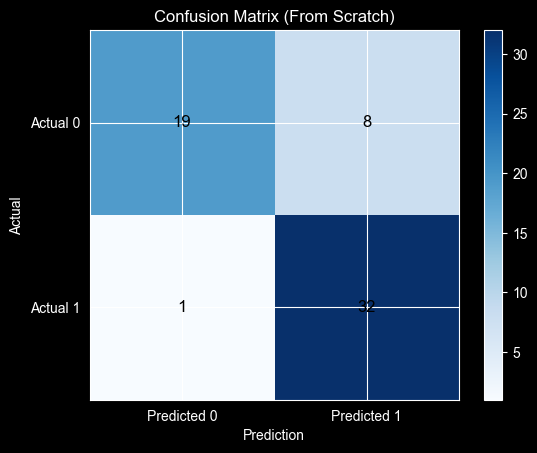

In [135]:
import matplotlib.pyplot as plt

plt.imshow(cm, cmap="Blues")
plt.colorbar()

plt.xticks([0, 1], ["Predicted 0", "Predicted 1"])
plt.yticks([0, 1], ["Actual 0", "Actual 1"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center", color="black", fontsize=12)

plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix (From Scratch)")
plt.show()


In [136]:
import numpy as np


y_test = np.array(y_test)
y_pred = np.array(y_pred)


TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))


accuracy = (TP + TN) / (TP + TN + FP + FN)

precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
balanced_accuracy = (recall + specificity) / 2


print("Confusion Matrix")
print(f"TP: {TP}   FP: {FP}")
print(f"FN: {FN}   TN: {TN}\n")

print("Evaluation Metrics")
print(f"Accuracy            : {accuracy:.4f}")
print(f"Precision           : {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity         : {specificity:.4f}")
print(f"F1 Score            : {f1_score:.4f}")
print(f"Balanced Accuracy   : {balanced_accuracy:.4f}")



Confusion Matrix
TP: 33   FP: 5
FN: 2   TN: 20

Evaluation Metrics
Accuracy            : 0.8833
Precision           : 0.8684
Recall (Sensitivity): 0.9429
Specificity         : 0.8000
F1 Score            : 0.9041
Balanced Accuracy   : 0.8714
